## \#3

Use the Gauss-Newton to fit the blood concentration model to the data of
from the previous HW without linearization.

The model from the previous homework is $y = c_1te^{c_2t}$ with data:$\\$
hour concentration (ng/ml) $\\$
1 6.2 $\\$
2 9.5 $\\$
3 12.3 $\\$
4 13.9 $\\$
5 14.6 $\\$
6 13.5 $\\$
7 13.3 $\\$
8 12.7 $\\$
9 12.4 $\\$
10 11.9


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def Gauss_Newton(data, residual, Jacobian, x0, max_iter = 15, tol = 1e-8):
    '''      
    Returns the nonlinear least squares solution using the Gauss-Newton method
    Inputs:
    * data (2D array): 
        - first row is independent variable data for the model
        - second row is dependent variable data for the model
    * residual: function of model parameters and independent variable
    from the model
    * Jacobian: function of model parameters and independent variable
    from the model
    * x0 (1D array): initial guess
    * max_iter: max number of iterations allowed, loop terminates and returns most
    x if limit is met
    * tol: tolerance level to determine stopping before max_iter
    Outputs:
    * x: final guess for least squares solution
    * i: number of iterations
    '''
    t = data[0, :]
    y = data[1, :]
    x = x0 # initialize x with the initial guess

    for i in range(max_iter): 
        r = residual(x, t, y) # calculate residual
        
        if np.linalg.norm(r) < tol:
            break
        
        A = Jacobian(x, t, y) # calculate A using the Jacobian

        v = np.linalg.solve(A.T @ A, - A.T @ r) # calculate v_k

        x = x + v # calculate next x_k
    
    return x, i

Since we found the least squares solution for the model in a previous homework, the initial guess is based off the solution found in the previous homework.

In [5]:
# input data
data = np.array([[1,2,3,4,5,6,7,8,9,10],
                [6.2,9.5,12.3,13.9,14.6,13.5,13.3,12.7,12.4,11.9]])

# define residual and Jacobian
residual = lambda c, t, y: c[0]*t*np.exp(c[1]*t) - y
Jacobian = lambda c, t, y: np.column_stack((t*np.exp(c[1]*t),
                                           c[0]*t*t*np.exp(c[1]*t)))

# give initial guess
x0 = np.array([10,0])

# solve least squares using GN method
c_hw5, iterations = Gauss_Newton(data, residual, Jacobian, x0, max_iter=10)
print(c_hw5)

[ 7.05422854 -0.18289874]


The results from using GN are pretty similar to that found in HW3 via linearization. We can plot the results now and compare the solutions.

RMSE HW3: 0.4005681734994683, RMSE HW5: 0.3966626676881407


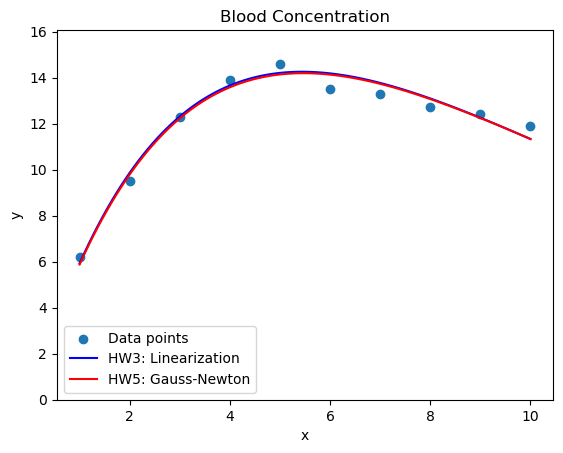

In [4]:
# plotting the results 
# copying in results from HW3
c_hw3 = [7.12202597, -0.18384897]
t = data[0, :]
y = data[1, :]

# calculating predicted values 
y_pred_hw3 = c_hw3[0]*t*np.exp(c_hw3[1]*t)
y_pred_hw5 = c_hw5[0]*t*np.exp(c_hw5[1]*t)

# calculating rmse
rmse_hw3 = np.sqrt(np.mean((y - y_pred_hw3)**2))
rmse_hw5 = np.sqrt(np.mean((y - y_pred_hw5)**2))

print(f'RMSE HW3: {rmse_hw3}, RMSE HW5: {rmse_hw5}')

# plotting data
plt.scatter(t, y, label = 'Data points')

# plotting models
x = np.linspace(t[0], t[-1], 100) # accessing t to generalize

y_hw3 = c_hw3[0]*x*np.exp(c_hw3[1]*x)
plt.plot(x, y_hw3, color = 'blue', label = 'HW3: Linearization')

y_hw5 = c_hw5[0]*x*np.exp(c_hw5[1]*x)
plt.plot(x, y_hw5, color = 'red', label = 'HW5: Gauss-Newton')

# Plot details
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Blood Concentration')
plt.ylim(0, np.max(y)*1.1)

plt.legend()
plt.show()

The outputs show that the solution using Gauss-Newton has a slightly better RMSE than the solution using linearization. The small difference is reflected in the graph where the curve are near identical. 

We'll now use the Levenberg-Marquardt method with $\lambda = 1$ and compare the performance to the Gauss-Newton result. 

In [7]:
def LM(data, residual, Jacobian, x0, lam, max_iter = 25, tol = 1e-8):
    '''      
    Returns the nonlinear least squares solution using the Levenberg-Marquardt method
    Inputs:
    * data (2D array): 
        - first row is independent variable data for the model
        - second row is dependent variable data for the model
    * residual: function of model parameters and independent variable
    from the model
    * Jacobian: function of model parameters and independent variable
    from the model
    * x0 (1D array): initial guess
    * lam: lambda value, tuning parameter
    * max_iter: max number of iterations allowed, loop terminates and returns most
    x if limit is met
    * tol: tolerance level to determine stopping before max_iter
    Outputs:
    * x: final guess for least squares solution
    * i: number of iterations
    '''
    t = data[0, :]
    y = data[1, :]
    x = x0 # initialize x with the initial guess

    for i in range(max_iter): 
        r = residual(x, t, y) # calculate residual
        
        if np.linalg.norm(r) < tol:
            break
        
        A = Jacobian(x, t, y) # calculate A using the Jacobian
        n = np.shape(A.T @ A)[0]
        lam_ATAdiag = lam * np.diag(np.diag(A.T @ A))
        ATA_ = (A.T @ A) + lam_ATAdiag 

        v = np.linalg.solve(ATA_, - A.T @ r) # calculate v_k

        x = x + v # calculate next x_k
    
    return x, i

In [8]:
# data, residual, and Jacobian stay the same from before
# give initial guess
x0 = np.array([10,0])
lam = 1

# solve least squares using GN method
c_hw5_LM, iterations = LM(data, residual, Jacobian, x0, lam)
print(c_hw5_LM)

[ 6.1351308  -0.16176289]


In [ ]:
# plotting the results 

# calculating predicted values 
y_pred_hw5_LM = c_hw5_LM[0]*t*np.exp(c_hw5_LM[1]*t)
y_pred_hw5 = c_hw5[0]*t*np.exp(c_hw5[1]*t)

# calculating rmse
rmse_hw5_LM = np.sqrt(np.mean((y - y_pred_hw5_LM)**2))
rmse_hw5 = np.sqrt(np.mean((y - y_pred_hw5)**2))

print(f'RMSE LM: {rmse_hw5_LM}, RMSE GN: {rmse_hw5}')

# plotting data
plt.scatter(t, y, label = 'Data points')

# plotting models
x = np.linspace(t[0], t[-1], 100) # accessing t to generalize

y_hw5_LM = c_hw5_LM[0]*x*np.exp(c_hw5_LM[1]*x)
plt.plot(x, y_hw5_LM, color = 'blue', label = 'HW5: Levenberg-Marquardt')

y_hw5 = c_hw5[0]*x*np.exp(c_hw5[1]*x)
plt.plot(x, y_hw5, color = 'red', label = 'HW5: Gauss-Newton')

# Plot details
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Blood Concentration')
plt.ylim(0, np.max(y)*1.1)

plt.legend()
plt.show()

## \#6

Apply Levenberg-Marquardt to fit the model $y = c_1e^{-c_2(t-c_3)^2}$ to the following data points, with an appropriate initial guess. State the initial guess, the regularization parameter $\lambda$ used, and the RMSE. Plot the best least squares curve and the data points.

$(t_i, y_i) = \{(1, 1), (2, 3), (4, 7), (5, 12), (6, 13), (8, 5), (9, 2), (11, 1)\}$

In [14]:
data = np.array([[1,2,4,5,6,8,9,11],
                 [1,3,7,12,13,5,2,1]])

# define residual and Jacobian
residual = lambda c, t, y: c[0]*np.exp(-c[1]*(t - c[2])**2) - y
Jacobian = lambda c, t, y: np.column_stack((np.exp(-c[1]*(t-c[2])**2),
                                           -c[0]*(t-c[2])**2*np.exp(-c[1]*(t-c[2])**2),
                                           2*c[0]*c[1]*(t-c[2])*np.exp(-c[1]*(t-c[2])**2)))

# give initial guess
x0 = np.array([0,0,0])
lam = 10

# solve least squares using GN method
c, iterations = LM(data, residual, Jacobian, x0, lam)
print(c)

[6.61596671 0.00699244 1.43170169]


RMSE LM: 4.263220806222439


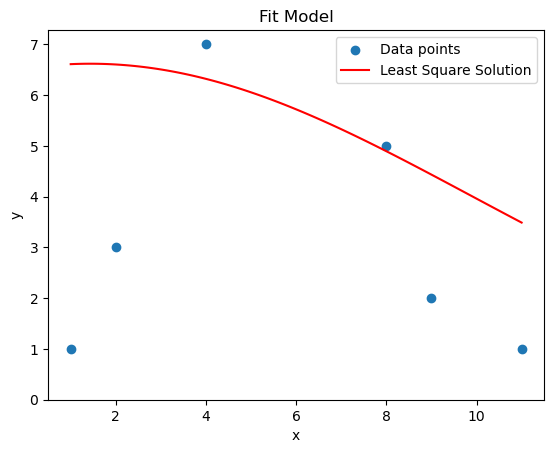

In [44]:
# plotting the results 
t = data[0, :]
y = data[1, :]

# calculating predicted values 
y_pred = c[0]*np.exp(-c[1]*(t-c[2])**2)

# calculating rmse
rmse = np.sqrt(np.mean((y - y_pred)**2))

print(f'RMSE LM: {rmse}')

# plotting data
plt.scatter(t, y, label = 'Data points')

# plotting models
x = np.linspace(t[0], t[-1], 100) # accessing t to generalize

y = c[0]*np.exp(-c[1]*(x-c[2])**2)
plt.plot(x, y, color = 'red', label = 'Least Square Solution')

# Plot details
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Fit Model')
plt.ylim(0, np.max(y)*1.1)

plt.legend()
plt.show()